# Guided Project: Visualizing Earnings Based On College Majors

The goal is to create data visualizations using the pandas plotting functionality inside Jupyter Notebook interface.

The dataset we use, [recent_grads.csv](https://github.com/fivethirtyeight/data/blob/master/college-majors/recent-grads.csv), is about job outcomes for college graduates in 2010-2012. The original data came from [American Community Survey](https://www.census.gov/programs-surveys/acs/), which was then cleaned and re-released by FiveThirtyEight on their [Github repo](https://github.com/fivethirtyeight/data/blob/master/college-majors) dataset.

## 1. Setting Up Environment

In [1]:
# Make plot displays inline
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

recent_grads = pd.read_csv("recent-grads.csv")
print("\n======= First row =======\n")
print(recent_grads.iloc[0])
print("\n======= First 5 rows =======\n")
print(recent_grads.head())
print("\n======= Last 5 rows =======\n")
print(recent_grads.tail())
print("\n======= Summary statistics =======\n")
print(recent_grads.describe())


======= First row =======

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 

In [2]:
raw_data_count = len(recent_grads.iloc[:,0])
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads.iloc[:,0])
print("Rows including NA values: ", raw_data_count)
print("Rows without NA values: ", cleaned_data_count)

Rows including NA values:  173
Rows without NA values:  172


## 2. Generating Scatter Plots

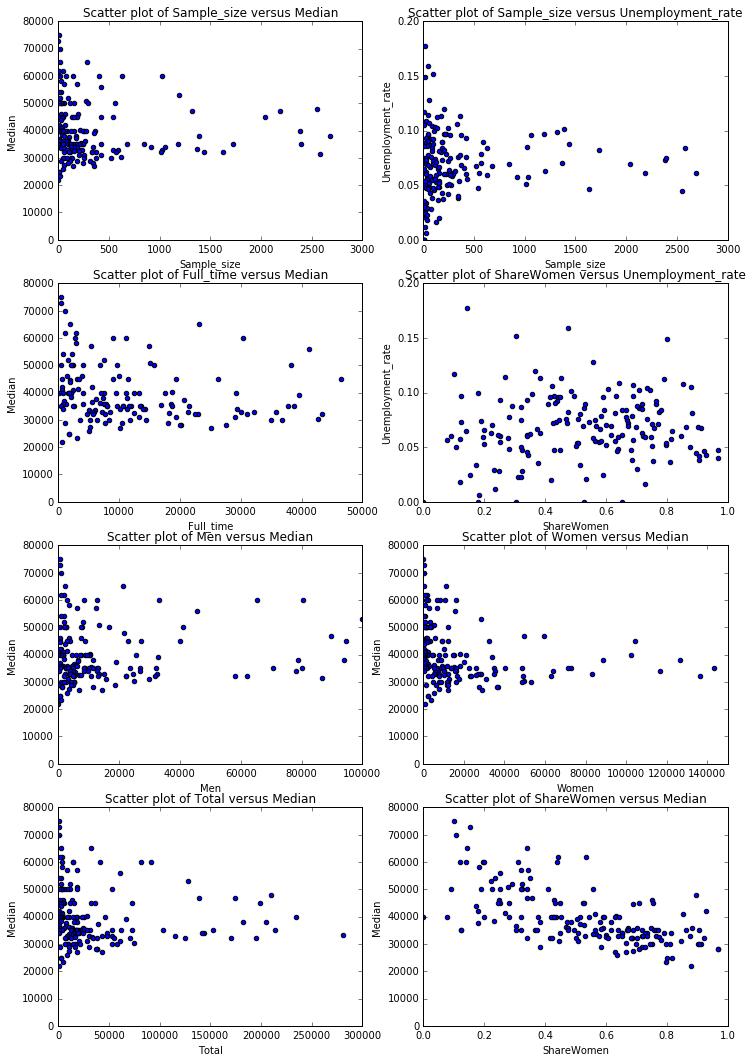

In [3]:
scatter_vars_list = [["Sample_size", "Median"],
                     ["Sample_size", "Unemployment_rate"],
                     ["Full_time", "Median"],
                     ["ShareWomen", "Unemployment_rate"],
                     ["Men", "Median"],
                     ["Women", "Median"],
                     ["Total", "Median"],
                     ["ShareWomen", "Median"]]
xylim_dict = {"Sample_size" : 3000, # Originally: 4500
              "Median" : 80000, # Originally: 120000
              "Unemployment_rate" : 0.2,
              "Full_time" : 50000, # Originally: 300000
              "ShareWomen" : 1.0,
              "Men" : 100000, # Originally: 200000
              "Women" : 150000, # Originally: 350000
              "Total" : 300000 # Originally: 400000
             }
(a, b) = (4, 2) # Define the size of subplots

fig, axes = plt.subplots(a, b, figsize = [12, 18])
axes = axes.flatten() # Converting to array
for i_a in range(a):
    for i_b in range(b):
        i = b*i_a + i_b
        [var1, var2] = scatter_vars_list[i]
        axes[i].scatter(recent_grads[var1], recent_grads[var2])
        axes[i].set_xlabel(var1)
        axes[i].set_ylabel(var2)
        axes[i].set_xlim([0, xylim_dict[var1]])
        axes[i].set_ylim([0, xylim_dict[var2]])
        axes[i].set_title("Scatter plot of " + var1 + " versus " + var2)
plt.show()

From the above plots, it seems that:
1. From `ShareWomen` vs `Median` (picture 4), there is no correlation between the percentage of women in a subject and the percentage of how many graduates from that subject have jobs.
2. According to picture 1,2,3,5,6 and 7, jobs that has less number of students (be it the total number, specifically male, female, full time, sample size) has more volatile median wages, as well as unemployment rate. Meanwhile, the variety of median and unemployment rate in jobs that has more students decreases, where the medians center around \$30,000-\$40,000 and the unemploymnet rates center around 5-10%.
3. The conclusion on (2) is quite expected. The variables of median and unemployment rate involve an average calculation, hence small number of population means that the end average value is less stable.
4. Based on picture 8, students that majored in subject that were majority female make less money.

## 3. Generating Histogram Plots

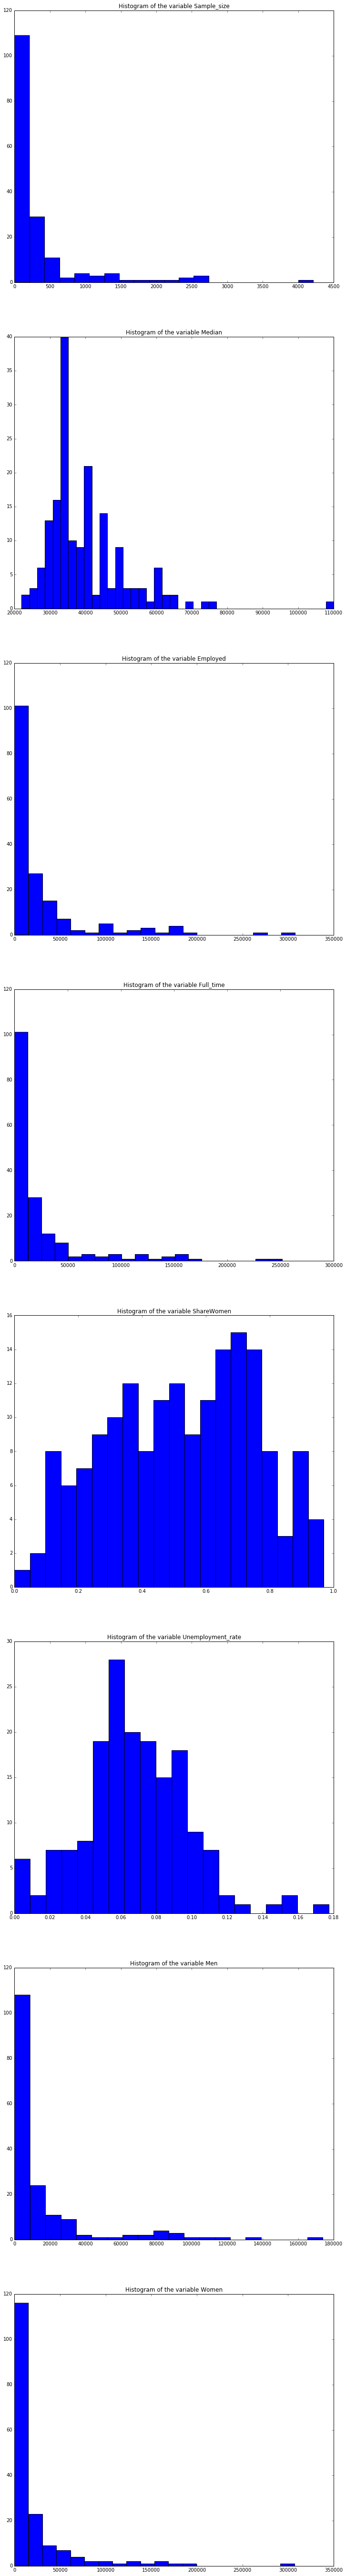

In [4]:
hist_var_list = ["Sample_size", "Median", "Employed",
                  "Full_time", "ShareWomen", "Unemployment_rate",
                  "Men", "Women"]
bins_dict = {"Sample_size" : 20,
              "Median" : 40,
              "Employed" : 20,
              "Full_time" : 20,
              "ShareWomen" : 20,
              "Unemployment_rate" : 20,
              "Men" : 20,
              "Women" : 20
             }
(a, b) = (8, 1) # Define the size of subplots

fig, axes = plt.subplots(a, b, figsize = [12, 96])
axes = axes.flatten() # Converting to array
for i_a in range(a):
    for i_b in range(b):
        i = b*i_a + i_b
        var = hist_var_list[i]
        axes[i].hist(recent_grads[var], bins_dict[var])
        axes[i].set_title("Histogram of the variable " + var)
plt.show()

We can infer a couple of things:
1. From the histogram of `ShareWomen`, around 60% of majors are predominantly female and 40% of majors are predominantly male.
2. From the histogram of `Median`, the most common median salary range is \$32,500-\$35,000.

## 3. Generating Scatter Matrix Plots

A scatter matrix plot is a combination of scatter plots and histograms in one grid, arranged into `n` times `n` subgrids, to provide users to explore potential relationships and distributions at once.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5c3857c50>,
      dtype=object)

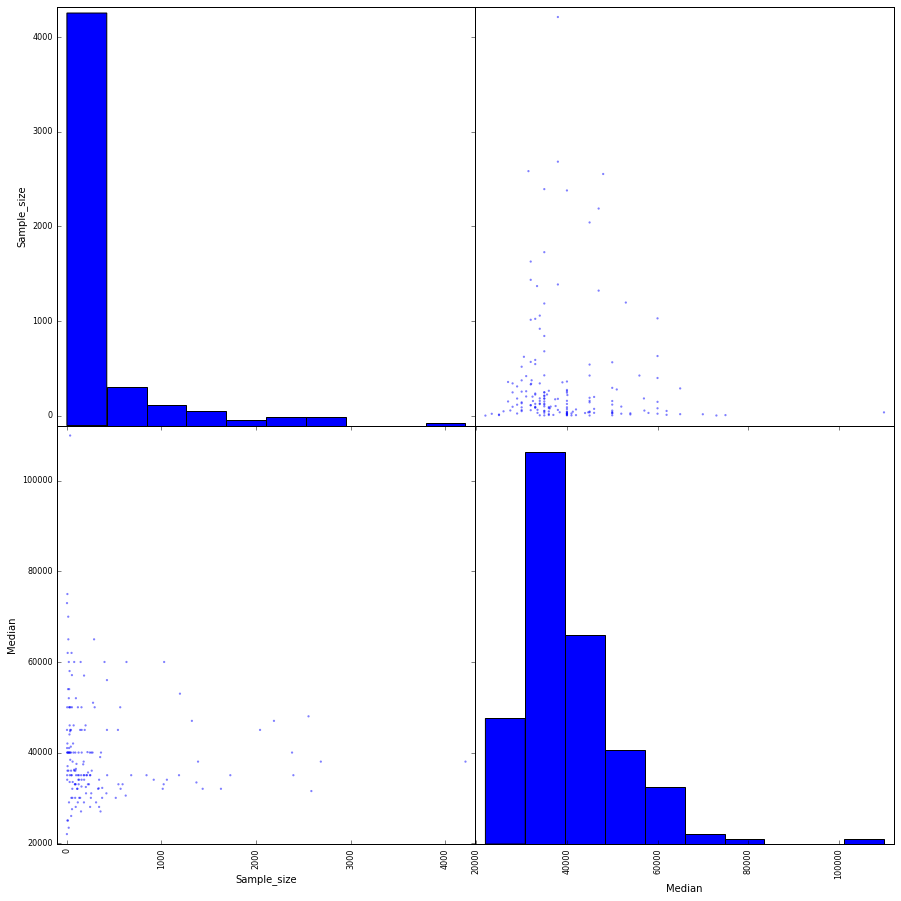

In [5]:
from pandas import plotting

default_figsize = [15, 15]
plotting.scatter_matrix(recent_grads[["Sample_size", "Median"]], figsize = default_figsize)
#plotting.scatter_matrix(recent_grads.loc[:,"Total":], figsize = default_figsize)

(SOOONNNNNN)

## 4. Generating Bar Plots

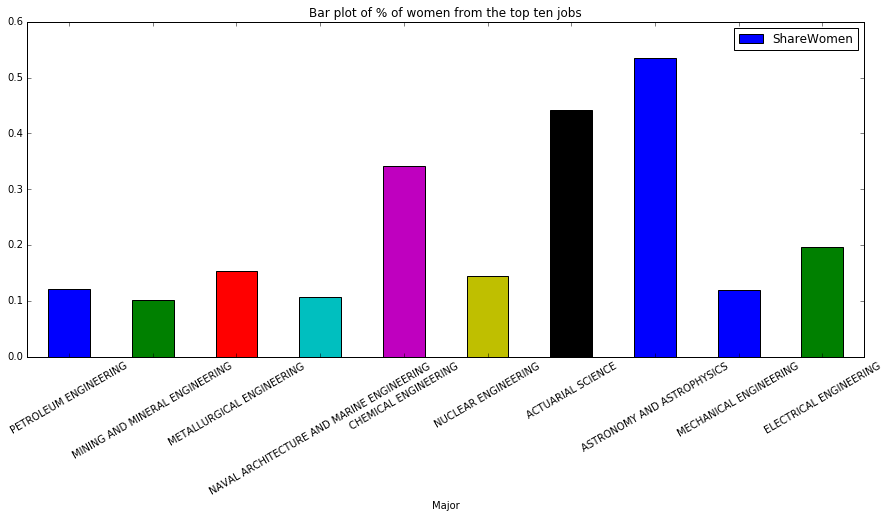

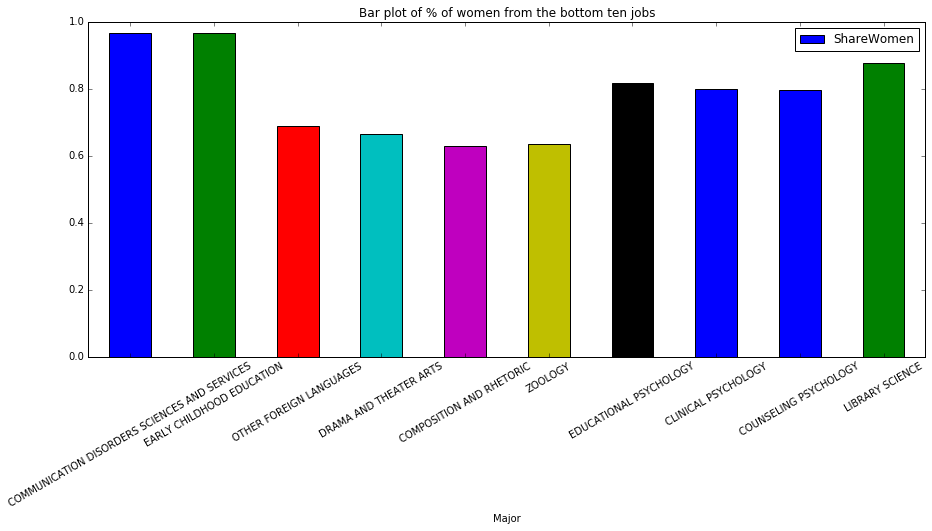

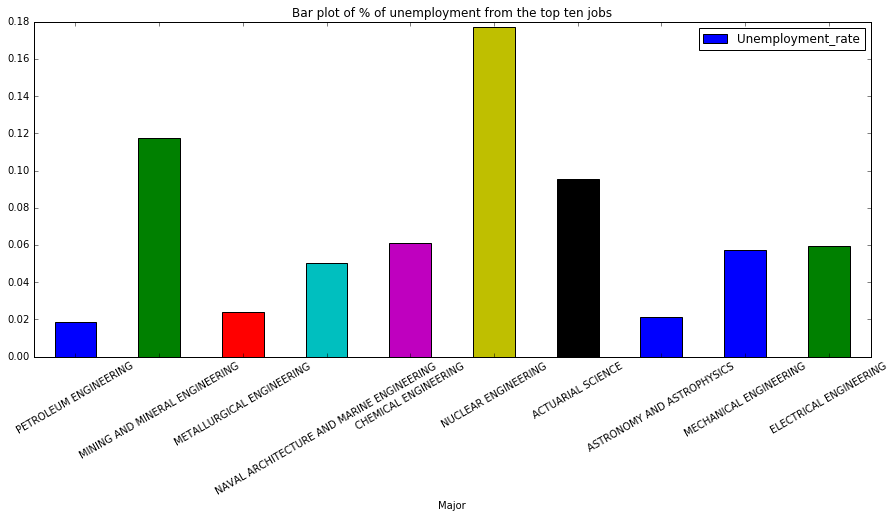

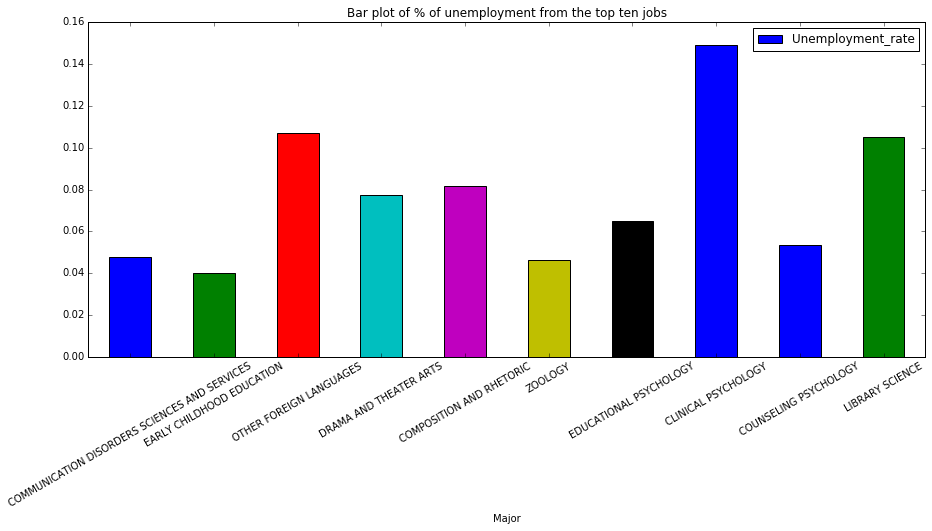

In [27]:
recent_grads[:10].plot.bar(x = "Major", y = "ShareWomen", figsize = [15, 6],
                           rot = 30, title = "Bar plot of % of women from the top ten jobs")
recent_grads[-10:].plot.bar(x = "Major", y = "ShareWomen", figsize = [15, 6],
                            rot = 30, title = "Bar plot of % of women from the bottom ten jobs")

recent_grads[:10].plot.bar(x = "Major", y = "Unemployment_rate", figsize = [15, 6],
                           rot = 30, title = "Bar plot of % of unemployment from the top ten jobs")
recent_grads[-10:].plot.bar(x = "Major", y = "Unemployment_rate", figsize = [15, 6],
                            rot = 30, title = "Bar plot of % of unemployment from the top ten jobs")

From the bar plots of first ten rows and last ten rows, top jobs tend to have low `ShareWomen` values while bottom jobs tend to have high `ShareWomen` values.

Meanwhile, both top and bottom ten jobs have similar `Unemployment_rate` of around 10%.

## 5. Conclusion

